In [1]:
using Pkg,Plots
Pkg.activate("..")
using OpenSAFT

 Activating environment at `~/Documents/University/UROP/SAFT codes/OpenSAFT/Project.toml`


In this notebook we will try to replicate various figures from V. Papaioannou _et al._ 's 2016 paper

## Figure 2

In [2]:
# Setting up the models
ethane       = system(gc("ethane"),"SAFTgammaMie")
propane      = system(gc("propane"),"SAFTgammaMie")
butane       = system(gc("butane"),"SAFTgammaMie")
pentane      = system(gc("pentane"),"SAFTgammaMie")
hexane       = system(gc("hexane"),"SAFTgammaMie")
heptane      = system(gc("heptane"),"SAFTgammaMie")
octane       = system(gc("octane"),"SAFTgammaMie")
nonane       = system(gc("nonane"),"SAFTgammaMie")
decane       = system(gc("decane"),"SAFTgammaMie");

In [3]:
# Get critical point for all species
(T_c_ethane, p_c_ethane, v_c_ethane)                   = get_crit_pure(ethane)
(T_c_propane, p_c_propane, v_c_propane)                = get_crit_pure(propane)
(T_c_butane, p_c_butane, v_c_butane)                   = get_crit_pure(butane)
(T_c_pentane, p_c_pentane, v_c_pentane)                = get_crit_pure(pentane)
(T_c_hexane, p_c_hexane, v_c_hexane)                   = get_crit_pure(hexane)
(T_c_heptane, p_c_heptane, v_c_heptane)                = get_crit_pure(heptane)
(T_c_octane, p_c_octane, v_c_octane)                   = get_crit_pure(octane)
(T_c_nonane, p_c_nonane, v_c_nonane)                   = get_crit_pure(nonane)
(T_c_decane, p_c_decane, v_c_decane)                   = get_crit_pure(decane);

In [4]:
# Get saturation properties for all species
T_ethane       = range(100, 0.99*T_c_ethane, length = 40)
T_propane      = range(120, 0.99*T_c_propane, length = 40)
T_butane       = range(150, 0.99*T_c_butane, length = 40)
T_pentane      = range(155, 0.99*T_c_pentane, length = 40)
T_hexane       = range(165, 0.99*T_c_hexane, length = 40)
T_heptane      = range(200, 0.99*T_c_heptane, length = 40)
T_octane       = range(200, 0.99*T_c_octane, length = 40)
T_nonane       = range(200, 0.99*T_c_nonane, length = 40)
T_decane       = range(200, 0.99*T_c_decane, length = 40)

B = get_sat_pure.(ethane,T_ethane)
C = get_sat_pure.(propane,T_propane)
D = get_sat_pure.(butane,T_butane)
E = get_sat_pure.(pentane,T_pentane)
F = get_sat_pure.(hexane,T_hexane)
G = get_sat_pure.(heptane,T_heptane)
H = get_sat_pure.(octane,T_octane)
I = get_sat_pure.(nonane,T_nonane)
J = get_sat_pure.(decane,T_decane)

v_l_ethane = append!([B[i][2] for i in 1:length(T_ethane)],v_c_ethane)
v_v_ethane = append!([B[i][3] for i in 1:length(T_ethane)],v_c_ethane)
v_l_propane = append!([C[i][2] for i in 1:length(T_propane)],v_c_propane)
v_v_propane = append!([C[i][3] for i in 1:length(T_propane)],v_c_propane)
v_l_butane = append!([D[i][2] for i in 1:length(T_butane)],v_c_butane)
v_v_butane = append!([D[i][3] for i in 1:length(T_butane)],v_c_butane)
v_l_pentane = append!([E[i][2] for i in 1:length(T_pentane)],v_c_pentane)
v_v_pentane = append!([E[i][3] for i in 1:length(T_pentane)],v_c_pentane)
v_l_hexane = append!([F[i][2] for i in 1:length(T_hexane)],v_c_hexane)
v_v_hexane = append!([F[i][3] for i in 1:length(T_hexane)],v_c_hexane)
v_l_heptane = append!([G[i][2] for i in 1:length(T_heptane)],v_c_heptane)
v_v_heptane = append!([G[i][3] for i in 1:length(T_heptane)],v_c_heptane)
v_l_octane = append!([H[i][2] for i in 1:length(T_octane)],v_c_octane)
v_v_octane = append!([H[i][3] for i in 1:length(T_octane)],v_c_octane)
v_l_nonane = append!([I[i][2] for i in 1:length(T_nonane)],v_c_nonane)
v_v_nonane = append!([I[i][3] for i in 1:length(T_nonane)],v_c_nonane)
v_l_decane = append!([J[i][2] for i in 1:length(T_decane)],v_c_decane)
v_v_decane = append!([J[i][3] for i in 1:length(T_decane)],v_c_decane)

P_sat_ethane = append!([B[i][1] for i in 1:length(T_ethane)],p_c_ethane)
P_sat_propane = append!([C[i][1] for i in 1:length(T_propane)],p_c_propane)
P_sat_butane = append!([D[i][1] for i in 1:length(T_butane)],p_c_butane)
P_sat_pentane = append!([E[i][1] for i in 1:length(T_pentane)],p_c_pentane)
P_sat_hexane = append!([F[i][1] for i in 1:length(T_hexane)],p_c_hexane)
P_sat_heptane = append!([G[i][1] for i in 1:length(T_heptane)],p_c_heptane)
P_sat_octane = append!([H[i][1] for i in 1:length(T_octane)],p_c_octane)
P_sat_nonane = append!([I[i][1] for i in 1:length(T_nonane)],p_c_nonane)
P_sat_decane = append!([J[i][1] for i in 1:length(T_decane)],p_c_decane)

T_ethane      = append!(collect(T_ethane),T_c_ethane)
T_propane      = append!(collect(T_propane),T_c_propane)
T_butane      = append!(collect(T_butane),T_c_butane)
T_pentane      = append!(collect(T_pentane),T_c_pentane)
T_hexane      = append!(collect(T_hexane),T_c_hexane)
T_heptane      = append!(collect(T_heptane),T_c_heptane)
T_octane      = append!(collect(T_octane),T_c_octane)
T_nonane      = append!(collect(T_nonane),T_c_nonane)
T_decane      = append!(collect(T_decane),T_c_decane);

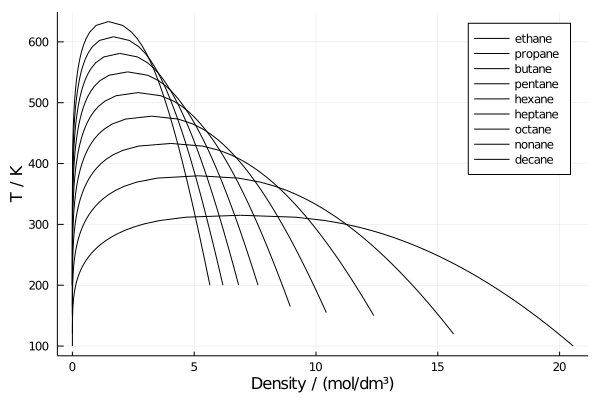

In [5]:
plt = plot( 1e-3 ./v_l_ethane,  T_ethane,color=:black,xlabel="Density / (mol/dm³)",ylabel="T / K", label = "ethane")
plt = plot!(1e-3 ./v_v_ethane,  T_ethane,color=:black, label = "")
plt = plot!(1e-3 ./v_l_propane, T_propane,color=:black, label = "propane")
plt = plot!(1e-3 ./v_v_propane, T_propane,color=:black, label = "")
plt = plot!(1e-3 ./v_l_butane,  T_butane,color=:black, label = "butane")
plt = plot!(1e-3 ./v_v_butane,  T_butane,color=:black, label = "")
plt = plot!(1e-3 ./v_l_pentane, T_pentane,color=:black, label = "pentane")
plt = plot!(1e-3 ./v_v_pentane, T_pentane,color=:black, label = "")
plt = plot!(1e-3 ./v_l_hexane,  T_hexane,color=:black, label = "hexane")
plt = plot!(1e-3 ./v_v_hexane,  T_hexane,color=:black, label = "")
plt = plot!(1e-3 ./v_l_heptane, T_heptane,color=:black, label = "heptane")
plt = plot!(1e-3 ./v_v_heptane, T_heptane,color=:black, label = "")
plt = plot!(1e-3 ./v_l_octane,  T_octane,color=:black, label = "octane")
plt = plot!(1e-3 ./v_v_octane,  T_octane,color=:black, label = "")
plt = plot!(1e-3 ./v_l_nonane,  T_nonane,color=:black, label = "nonane")
plt = plot!(1e-3 ./v_v_nonane,  T_nonane,color=:black, label = "")
plt = plot!(1e-3 ./v_l_decane,  T_decane,color=:black, label = "decane")
plt = plot!(1e-3 ./v_v_decane,  T_decane,color=:black, label = "")
display(plt)

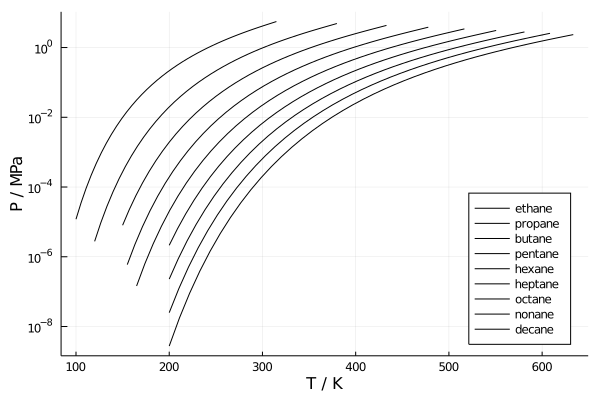

In [6]:
plt = plot(T_ethane,P_sat_ethane/1e6,color=:black,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "ethane",legend=:bottomright)
plt = plot!(T_propane,P_sat_propane/1e6,color=:black, label = "propane")
plt = plot!(T_butane,P_sat_butane/1e6,color=:black, label = "butane")
plt = plot!(T_pentane,P_sat_pentane/1e6,color=:black, label = "pentane")
plt = plot!(T_hexane,P_sat_hexane/1e6,color=:black, label = "hexane")
plt = plot!(T_heptane,P_sat_heptane/1e6,color=:black, label = "heptane")
plt = plot!(T_octane,P_sat_octane/1e6,color=:black, label = "octane")
plt = plot!(T_nonane,P_sat_nonane/1e6,color=:black, label = "nonane")
plt = plot!(T_decane,P_sat_decane/1e6,color=:black, label = "decane")
display(plt)

## Figure 4

In [7]:
# Setting up the models
EthAce       = system(gc("ethyl acetate"),"SAFTgammaMie")
PropAce      = system(gc("propyl acetate"),"SAFTgammaMie")
ButAce       = system(gc("butyl acetate"),"SAFTgammaMie")
PentAce      = system(gc("pentyl acetate"),"SAFTgammaMie")
HexAce       = system(gc("hexyl acetate"),"SAFTgammaMie")
HeptAce     = system(gc("heptyl acetate"),"SAFTgammaMie");

In [8]:
# Get critical point for all species
(T_c_EthAce, p_c_EthAce, v_c_EthAce)                   = get_crit_pure(EthAce)
(T_c_PropAce, p_c_PropAce, v_c_PropAce)                = get_crit_pure(PropAce)
(T_c_ButAce, p_c_ButAce, v_c_ButAce)                   = get_crit_pure(ButAce)
(T_c_PentAce, p_c_PentAce, v_c_PentAce)                = get_crit_pure(PentAce)
(T_c_HexAce, p_c_HexAce, v_c_HexAce)                   = get_crit_pure(HexAce)
(T_c_HeptAce, p_c_HeptAce, v_c_HeptAce)                = get_crit_pure(HeptAce);

In [ ]:
# Get saturation Properties for all species
T_EthAce       = range(250, 0.99*T_c_EthAce, length = 40)
T_PropAce      = range(250, 0.99*T_c_PropAce, length = 40)
T_ButAce       = range(250, 0.99*T_c_ButAce, length = 40)
T_PentAce      = range(250, 0.99*T_c_PentAce, length = 30)
T_HexAce       = range(250, 0.99*T_c_HexAce, length = 40)
T_HeptAce      = range(250, 0.99*T_c_HeptAce, length = 40)

A = get_sat_pure.(EthAce,T_EthAce)
B = get_sat_pure.(PropAce,T_PropAce)
C = get_sat_pure.(ButAce,T_ButAce)
D = get_sat_pure.(PentAce,T_PentAce)
E = get_sat_pure.(HexAce,T_HexAce)
F = get_sat_pure.(HeptAce,T_HeptAce)

v_l_EthAce = append!([A[i][2] for i in 1:length(T_EthAce)],v_c_EthAce)
v_v_EthAce = append!([A[i][3] for i in 1:length(T_EthAce)],v_c_EthAce)
v_l_PropAce = append!([B[i][2] for i in 1:length(T_PropAce)],v_c_PropAce)
v_v_PropAce = append!([B[i][3] for i in 1:length(T_PropAce)],v_c_PropAce)
v_l_ButAce = append!([C[i][2] for i in 1:length(T_ButAce)],v_c_ButAce)
v_v_ButAce = append!([C[i][3] for i in 1:length(T_ButAce)],v_c_ButAce)
v_l_PentAce = append!([D[i][2] for i in 1:length(T_PentAce)],v_c_PentAce)
v_v_PentAce = append!([D[i][3] for i in 1:length(T_PentAce)],v_c_PentAce)
v_l_HexAce = append!([E[i][2] for i in 1:length(T_HexAce)],v_c_HexAce)
v_v_HexAce = append!([E[i][3] for i in 1:length(T_HexAce)],v_c_HexAce)
v_l_HeptAce = append!([F[i][2] for i in 1:length(T_HeptAce)],v_c_HeptAce)
v_v_HeptAce = append!([F[i][3] for i in 1:length(T_HeptAce)],v_c_HeptAce)

P_sat_EthAce = append!([A[i][1] for i in 1:length(T_EthAce)],p_c_EthAce)
P_sat_PropAce = append!([B[i][1] for i in 1:length(T_PropAce)],p_c_PropAce)
P_sat_ButAce = append!([C[i][1] for i in 1:length(T_ButAce)],p_c_ButAce)
P_sat_PentAce = append!([D[i][1] for i in 1:length(T_PentAce)],p_c_PentAce)
P_sat_HexAce = append!([E[i][1] for i in 1:length(T_HexAce)],p_c_HexAce)
P_sat_HeptAce = append!([F[i][1] for i in 1:length(T_HeptAce)],p_c_HeptAce)

T_EthAce      = append!(collect(T_EthAce),T_c_EthAce)
T_PropAce      = append!(collect(T_PropAce),T_c_PropAce)
T_ButAce      = append!(collect(T_ButAce),T_c_ButAce)
T_PentAce      = append!(collect(T_PentAce),T_c_PentAce)
T_HexAce      = append!(collect(T_HexAce),T_c_HexAce)
T_HeptAce      = append!(collect(T_HeptAce),T_c_HeptAce);

In [ ]:
plt = plot( 1e-3 ./v_l_EthAce,  T_EthAce,  color=:black, label = "ethyl acetate",xlabel="Density / (mol/dm³)",ylabel="T / K")
plt = plot!(1e-3 ./v_v_EthAce,  T_EthAce,  color=:black, label = "")
plt = plot!(1e-3 ./v_l_PropAce, T_PropAce, color=:black, label = "propyl acetate")
plt = plot!(1e-3 ./v_v_PropAce, T_PropAce, color=:black, label = "")
plt = plot!(1e-3 ./v_l_ButAce,  T_ButAce,  color=:black, label = "butyl acetate")
plt = plot!(1e-3 ./v_v_ButAce,  T_ButAce,  color=:black, label = "")
plt = plot!(1e-3 ./v_l_PentAce, T_PentAce, color=:black, label = "pentyl acetate")
plt = plot!(1e-3 ./v_v_PentAce, T_PentAce, color=:black, label = "")
plt = plot!(1e-3 ./v_l_HexAce,  T_HexAce,  color=:black, label = "hexyl acetate")
plt = plot!(1e-3 ./v_v_HexAce,  T_HexAce,  color=:black, label = "")
plt = plot!(1e-3 ./v_l_HeptAce, T_HeptAce, color=:black, label = "heptyl acetate")
plt = plot!(1e-3 ./v_v_HeptAce, T_HeptAce, color=:black, label = "")
display(plt)

In [ ]:
plt = plot( T_EthAce,  P_sat_EthAce/1e6,  color=:black, label = "ethyl acetate",yaxis=:log,xlabel="T / K",ylabel="P / MPa",legend=:bottomright)
plt = plot!(T_PropAce, P_sat_PropAce/1e6, color=:black, label = "propyl acetate")
plt = plot!(T_ButAce,  P_sat_ButAce/1e6,  color=:black, label = "butyl acetate")
plt = plot!(T_PentAce, P_sat_PentAce/1e6, color=:black, label = "pentyl acetate")
plt = plot!(T_HexAce,  P_sat_HexAce/1e6,  color=:black, label = "hexyl acetate")
plt = plot!(T_HeptAce, P_sat_HeptAce/1e6, color=:black, label = "heptyl acetate")
display(plt)

## Figure 8

In [ ]:
# Setting up the models
pentadecane       = system(gc("pentadecane"),"SAFTgammaMie")
eicosane          = system(gc("eicosane"),"SAFTgammaMie")
pentacosane       = system(gc("pentacosane"),"SAFTgammaMie")
triacontane       = system(gc("triacontane"),"SAFTgammaMie");

In [ ]:
# Get critical point for all species
(T_c_pentadecane, p_c_pentadecane, v_c_pentadecane)     = get_crit_pure(pentadecane)
(T_c_eicosane, p_c_eicosane, v_c_eicosane)              = get_crit_pure(eicosane)
(T_c_pentacosane, p_c_pentacosane, v_c_pentacosane)     = get_crit_pure(pentacosane)
(T_c_triacontane, p_c_triacontane, v_c_triacontane)     = get_crit_pure(triacontane);

In [ ]:
# Get saturation properties for all species
T_pentadecane   = range(350, 0.99*T_c_pentadecane, length = 50)
T_eicosane      = range(350, 0.99*T_c_eicosane,    length = 50)
T_pentacosane   = range(350, 0.99*T_c_pentacosane, length = 50)
T_triacontane   = range(350, 0.98*T_c_triacontane, length = 50)

A = get_sat_pure.(pentadecane,T_pentadecane)
B = get_sat_pure.(eicosane,T_eicosane)
C = get_sat_pure.(pentacosane,T_pentacosane)
D = get_sat_pure.(triacontane,T_triacontane)

v_l_pentadecane = append!([A[i][2] for i in 1:length(T_pentadecane)],v_c_pentadecane)
v_v_pentadecane = append!([A[i][3] for i in 1:length(T_pentadecane)],v_c_pentadecane)
v_l_eicosane = append!([B[i][2] for i in 1:length(T_eicosane)],v_c_eicosane)
v_v_eicosane = append!([B[i][3] for i in 1:length(T_eicosane)],v_c_eicosane)
v_l_pentacosane = append!([C[i][2] for i in 1:length(T_pentacosane)],v_c_pentacosane)
v_v_pentacosane = append!([C[i][3] for i in 1:length(T_pentacosane)],v_c_pentacosane)
v_l_triacontane = append!([D[i][2] for i in 1:length(T_triacontane)],v_c_triacontane)
v_v_triacontane = append!([D[i][3] for i in 1:length(T_triacontane)],v_c_triacontane)

P_sat_pentadecane = append!([A[i][1] for i in 1:length(T_pentadecane)],p_c_pentadecane)
P_sat_eicosane = append!([B[i][1] for i in 1:length(T_eicosane)],p_c_eicosane)
P_sat_pentacosane = append!([C[i][1] for i in 1:length(T_pentacosane)],p_c_pentacosane)
P_sat_triacontane = append!([D[i][1] for i in 1:length(T_triacontane)],p_c_triacontane)

T_pentadecane      = append!(collect(T_pentadecane),T_c_pentadecane)
T_eicosane      = append!(collect(T_eicosane),T_c_eicosane)
T_pentacosane      = append!(collect(T_pentacosane),T_c_pentacosane)
T_triacontane      = append!(collect(T_triacontane),T_c_triacontane);

In [ ]:
plt = plot( 1e-3 ./v_l_pentadecane,  T_pentadecane, color=:black, label = "pentadecane", xlabel="Density / (mol/dm³)",ylabel="T / K")
plt = plot!(1e-3 ./v_v_pentadecane,  T_pentadecane, color=:black, label = "")
plt = plot!(1e-3 ./v_l_eicosane,     T_eicosane,    color=:black, label = "eicosane")
plt = plot!(1e-3 ./v_v_eicosane,     T_eicosane,    color=:black, label = "")
plt = plot!(1e-3 ./v_l_pentacosane,  T_pentacosane, color=:black, label = "pentacosane")
plt = plot!(1e-3 ./v_v_pentacosane,  T_pentacosane, color=:black, label = "")
plt = plot!(1e-3 ./v_l_triacontane,  T_triacontane, color=:black, label = "triacontane")
plt = plot!(1e-3 ./v_v_triacontane,  T_triacontane, color=:black, label = "")
display(plt)

In [ ]:
plt = plot(T_pentadecane,P_sat_pentadecane/1e6,color=:black,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "pentadecane",legend=:bottomright)
plt = plot!(T_eicosane,P_sat_eicosane/1e6,color=:black, label = "eicosane")
plt = plot!(T_pentacosane,P_sat_pentacosane/1e6,color=:black, label = "pentacosane")
plt = plot!(T_triacontane,P_sat_triacontane/1e6,color=:black, label = "triacontane")
display(plt)